# Benchmark Metrics Overview

In benchmarking, crucial metrics such as steps taken per scenario, collision, out of drivable area, exceeded maximum steps and goal reached are recorded.
These metrics are further analyzed under varying conditions of provided belief information. i.e. vanilla belief observer, belief observer with thresholding, belief observer with discretized beliefs and belief observer with thresholding and discretization. Further, varied belief information in the form of behavior subspaces, each representing k in K total hypotheses. i.e. 2, 4, 8 splits of the behavior space also influence learning in the network

## Some necessary imports and utilities

In [13]:
%matplotlib inline
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorboard
import os
import sys
from IPython.display import HTML
# %load_ext tensorboard

exp_dir_root = "/home/ekumar/master_thesis/results/training/december/iqn/"

sns.set_theme(style="whitegrid")
sns.color_palette("Set2")

plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.rcParams['font.family'] = "serif"
sns.set(font_scale=2)


def load_from_dir(exp_dir):
    return os.path.join(exp_dir_root, exp_dir)

def load_benchmark_data(exp_dir, bm_file="benchmark/data_225_pretrain_light_dense_12_16"):
    return pd.read_pickle(os.path.join(load_from_dir(exp_dir), bm_file))

In [2]:
iqn_lfd_demo1 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff", bm_file="benchmark/data_225_online_light_dense_12_16")
iqn_lfd_demo_bevan1 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bevanilla", bm_file="benchmark/data_225_online_light_dense_12_16")
iqn_lfd_demo_bethdi641 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_225_online_light_dense_12_16")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth1 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_beth", bm_file="benchmark/data_225_online_light_dense_12_16")
iqn_lfd_demo_bedi641 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bedi64", bm_file="benchmark/data_225_online_light_dense_12_16")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated1 = pd.concat([iqn_lfd_demo1.assign(behavior='LFD 12,16'),
                           iqn_lfd_demo_bevan1.assign(behavior='LFD BEVAN 12,16'),
                           iqn_lfd_demo_bethdi641.assign(behavior='LFD BETHDI64 12,16'),
                           iqn_lfd_demo_beth1.assign(behavior='LFD BETH 12,16'),
                           iqn_lfd_demo_bedi641.assign(behavior='LFD BEDI64 12,16'),])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated1)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']
HTML(data.to_html())


,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"LFD 12,16",96.888889,1.777778,0.888889,0.444444
"LFD BEDI64 12,16",97.333333,1.777778,0.000000,0.888889
"LFD BETH 12,16",88.444444,9.333333,0.000000,2.222222
"LFD BETHDI64 12,16",89.333333,7.111111,0.000000,4.000000
"LFD BEVAN 12,16",92.444444,5.333333,0.000000,2.222222


In [4]:
iqn_lfd_demo2 = load_benchmark_data("exp_iqn_lbnw", bm_file="benchmark/data_225_online_light_dense_12_16")
iqn_lfd_demo_bevan2 = load_benchmark_data("exp_van2_lbnw_ld", bm_file="benchmark/data_225_online_light_dense_12_16")
iqn_lfd_demo_bethdi642 = load_benchmark_data("exp_2_lbnw_ld", bm_file="benchmark/data_225_online_light_dense_12_16")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth2 = load_benchmark_data("exp_2_ldth", bm_file="benchmark/data_225_light_dense_12_16")
iqn_lfd_demo_bedi642 = load_benchmark_data("exp_2_lddi64", bm_file="benchmark/data_225_light_dense_12_16")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated2 = pd.concat([iqn_lfd_demo2.assign(behavior='Standalone IQN 12,16'),
                           iqn_lfd_demo_bevan2.assign(behavior='BO-IQN 12,16'),
                           iqn_lfd_demo_bethdi642.assign(behavior='BO-IQN TH,DISC(64) 12,16'),
                           iqn_lfd_demo_beth2.assign(behavior='BO-IQN TH 12,16'),
                           iqn_lfd_demo_bedi642.assign(behavior='BO-IQN DISC(64) 12,16')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated2)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)

data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"BO-IQN 12,16",84.444444,11.555556,0.444444,3.555556
"BO-IQN DISC(64) 12,16",94.222222,5.333333,0.888889,0.444444
"BO-IQN TH 12,16",96.000000,2.666667,0.888889,0.444444
"BO-IQN TH,DISC(64) 12,16",91.111111,7.111111,0.888889,1.333333
"Standalone IQN 12,16",99.555556,0.000000,0.000000,0.444444


In [5]:
iqn_lfd_demo3 = load_benchmark_data("exp_iqn_lbnw", bm_file="benchmark/data_225_online_light_dense_11_15")
iqn_lfd_demo_bevan3 = load_benchmark_data("exp_van2_lbnw_ld", bm_file="benchmark/data_225_online_light_dense_11_15")
iqn_lfd_demo_bethdi643 = load_benchmark_data("exp_2_lbnw_ld", bm_file="benchmark/data_225_online_light_dense_11_15")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth3 = load_benchmark_data("exp_2_ldth", bm_file="benchmark/data_225_online_light_dense_11_15")
iqn_lfd_demo_bedi643 = load_benchmark_data("exp_2_lddi64", bm_file="benchmark/data_225_online_light_dense_11_15")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated3 = pd.concat([iqn_lfd_demo3.assign(behavior='Standalone IQN 11,15'),
                           iqn_lfd_demo_bevan3.assign(behavior='BO-IQN 11,15'),
                           iqn_lfd_demo_bethdi643.assign(behavior='BO-IQN TH,DISC(64) 11,15'),
                           iqn_lfd_demo_beth3.assign(behavior='BO-IQN TH 11,15'),
                           iqn_lfd_demo_bedi643.assign(behavior='BO-IQN DISC(64) 11,15')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated3)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']
# print(data.to_latex())

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"BO-IQN 11,15",73.333333,17.777778,3.555556,6.666667
"BO-IQN DISC(64) 11,15",92.000000,5.333333,0.888889,1.777778
"BO-IQN TH 11,15",91.111111,6.666667,0.888889,1.333333
"BO-IQN TH,DISC(64) 11,15",80.888889,10.666667,1.333333,7.555556
"Standalone IQN 11,15",96.444444,0.444444,0.444444,2.666667


In [6]:
iqn_lfd_demo4 = load_benchmark_data("exp_iqn_lbnw", bm_file="benchmark/data_225_online_light_dense_10_14")
iqn_lfd_demo_bevan4 = load_benchmark_data("exp_van2_lbnw_ld", bm_file="benchmark/data_225_online_light_dense_10_14")
iqn_lfd_demo_bethdi644 = load_benchmark_data("exp_2_lbnw_ld", bm_file="benchmark/data_225_online_light_dense_10_14")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth4 = load_benchmark_data("exp_2_ldth", bm_file="benchmark/data_225_online_light_dense_10_14")
iqn_lfd_demo_bedi644 = load_benchmark_data("exp_2_lddi64", bm_file="benchmark/data_225_online_light_dense_10_14")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated4 = pd.concat([iqn_lfd_demo4.assign(behavior='Standalone IQN 10,14'),
                           iqn_lfd_demo_bevan4.assign(behavior='BO-IQN 10,14'),
                           iqn_lfd_demo_bethdi644.assign(behavior='BO-IQN TH,DISC(64) 10,14'),
                           iqn_lfd_demo_beth4.assign(behavior='BO-IQN TH 10,14'),
                           iqn_lfd_demo_bedi644.assign(behavior='BO-IQN DISC(64) 0,14')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated4)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"BO-IQN 10,14",5.333333,87.111111,1.777778,6.222222
"BO-IQN DISC(64) 0,14",6.222222,71.555556,2.222222,21.333333
"BO-IQN TH 10,14",1.777778,62.222222,0.444444,36.000000
"BO-IQN TH,DISC(64) 10,14",4.444444,74.666667,4.444444,18.666667
"Standalone IQN 10,14",4.444444,97.777778,0.000000,0.000000


In [7]:
iqn_lfd_demo5 = load_benchmark_data("exp_iqn_lbnw", bm_file="benchmark/data_225_online_mid_dense_6_10")
iqn_lfd_demo_bevan5 = load_benchmark_data("exp_van2_lbnw_ld", bm_file="benchmark/data_225_online_mid_dense_6_10")
iqn_lfd_demo_bethdi645 = load_benchmark_data("exp_2_lbnw_ld", bm_file="benchmark/data_225_online_mid_dense_6_10")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth5 = load_benchmark_data("exp_2_ldth", bm_file="benchmark/data_225_online_mid_dense_6_10")
iqn_lfd_demo_bedi645 = load_benchmark_data("exp_2_lddi64", bm_file="benchmark/data_225_online_mid_dense_6_10")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated5 = pd.concat([iqn_lfd_demo5.assign(behavior='Standalone IQN 6,10'),
                           iqn_lfd_demo_bevan5.assign(behavior='BO-IQN 10,14'),
                           iqn_lfd_demo_bethdi645.assign(behavior='BO-IQN TH,DISC(64) 10,14'),
                           iqn_lfd_demo_beth5.assign(behavior='BO-IQN TH 10,14'),
                           iqn_lfd_demo_bedi645.assign(behavior='BO-IQN DISC(64) 10,14')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated5)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"BO-IQN 10,14",10.666667,83.111111,3.111111,3.555556
"BO-IQN DISC(64) 10,14",6.666667,84.444444,3.555556,7.111111
"BO-IQN TH 10,14",15.555556,48.888889,1.777778,36.444444
"BO-IQN TH,DISC(64) 10,14",10.222222,74.666667,4.000000,14.666667
"Standalone IQN 6,10",8.444444,92.000000,0.000000,1.333333


In [8]:
iqn_lfd_demo6 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff", bm_file="benchmark/data_225_online_light_dense_11_15")
iqn_lfd_demo_bevan6 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bevanilla", bm_file="benchmark/data_225_online_light_dense_11_15")
iqn_lfd_demo_bethdi646 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_225_online_light_dense_11_15")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth6 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_beth", bm_file="benchmark/data_225_online_light_dense_11_15")
iqn_lfd_demo_bedi646 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bedi64", bm_file="benchmark/data_225_online_light_dense_11_15")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated6 = pd.concat([iqn_lfd_demo6.assign(behavior='LFD 11,15'),
                           iqn_lfd_demo_bevan6.assign(behavior='LFD BEVAN 11,15'),
                           iqn_lfd_demo_bethdi646.assign(behavior='LFD BETHDI64 11,15'),
                           iqn_lfd_demo_beth6.assign(behavior='LFD BETH 11,15'),
                           iqn_lfd_demo_bedi646.assign(behavior='LFD BEDI64 11,15')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated6)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"LFD 11,15",88.000000,11.111111,0.444444,0.444444
"LFD BEDI64 11,15",90.666667,8.888889,0.000000,0.888889
"LFD BETH 11,15",81.333333,14.666667,0.444444,4.000000
"LFD BETHDI64 11,15",85.777778,11.555556,0.444444,2.222222
"LFD BEVAN 11,15",87.555556,10.222222,0.000000,2.222222


In [9]:
iqn_lfd_demo7 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff", bm_file="benchmark/data_225_online_light_dense_10_14")
iqn_lfd_demo_bevan7 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bevanilla", bm_file="benchmark/data_225_online_light_dense_10_14")
iqn_lfd_demo_bethdi647 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_225_online_light_dense_10_14")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth7 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_beth", bm_file="benchmark/data_225_online_light_dense_10_14")
iqn_lfd_demo_bedi647 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bedi64", bm_file="benchmark/data_225_online_light_dense_10_14")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated7 = pd.concat([iqn_lfd_demo7.assign(behavior='LFD 10,14'),
                           iqn_lfd_demo_bevan7.assign(behavior='LFD BEVAN 10,14'),
                           iqn_lfd_demo_bethdi647.assign(behavior='LFD BETHDI64 10,14'),
                           iqn_lfd_demo_beth7.assign(behavior='LFD BETH 10,14'),
                           iqn_lfd_demo_bedi647.assign(behavior='LFD BEDI64 10,14')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated7)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"LFD 10,14",1.333333,15.555556,0.888889,82.222222
"LFD BEDI64 10,14",4.000000,86.222222,4.888889,6.666667
"LFD BETH 10,14",5.777778,96.444444,0.000000,0.000000
"LFD BETHDI64 10,14",3.555556,82.666667,1.333333,13.777778
"LFD BEVAN 10,14",3.555556,81.333333,9.333333,8.000000


In [10]:
iqn_lfd_demo8 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff", bm_file="benchmark/data_225_online_mid_dense_6_10")
iqn_lfd_demo_bevan8 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bevanilla", bm_file="benchmark/data_225_online_mid_dense_6_10")
iqn_lfd_demo_bethdi648 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_225_online_mid_dense_6_10")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth8 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_beth", bm_file="benchmark/data_225_online_mid_dense_6_10")
iqn_lfd_demo_bedi648 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bedi64", bm_file="benchmark/data_225_online_mid_dense_6_10")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated8 = pd.concat([iqn_lfd_demo8.assign(behavior='LFD 6,10'),
                           iqn_lfd_demo_bevan8.assign(behavior='LFD BEVAN 6,10'),
                           iqn_lfd_demo_bethdi648.assign(behavior='LFD BETHDI64 6,10'),
                           iqn_lfd_demo_beth8.assign(behavior='LFD BETH 6,10'),
                           iqn_lfd_demo_bedi648.assign(behavior='LFD BEDI64 6,10')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated8)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"LFD 6,10",16.444444,44.444444,0.888889,39.555556
"LFD BEDI64 6,10",6.666667,93.333333,0.000000,1.777778
"LFD BETH 6,10",10.666667,93.333333,0.000000,0.000000
"LFD BETHDI64 6,10",8.000000,81.333333,1.777778,11.555556
"LFD BEVAN 6,10",5.333333,89.333333,0.444444,5.333333


In [14]:
# PRE TRAINING
iqn_lfd_demo9 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff")
iqn_lfd_demo_bevan9 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bevanilla")
iqn_lfd_demo_bethdi649 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bethdi64")#, bm_file="benchmark/data_100_light_dense_12_16_2")
# iqn_lfd_demo_bethdi64 = load_benchmark_data("lfd/feb/exp_iqn_fixed_onoff_bethdi64", bm_file="benchmark/data_100_light_dense_12_16")
iqn_lfd_demo_beth9 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_beth")
iqn_lfd_demo_bedi649 = load_benchmark_data("lfd/feb/fixed/exp_iqn_fixed_onoff_bedi64")
# iqn_lfd_demo1115 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_11_15")
# iqn_lfd_demo1014 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_loaded_demo", "benchmark/data_100_light_dense_10_14")
# iqn_lfd_bedi64 = load_benchmark_data("lfd/feb/exp_iqn_pre_exp_2sdi64")

concatenated9 = pd.concat([iqn_lfd_demo9.assign(behavior='LFD'),
                           iqn_lfd_demo_bevan9.assign(behavior='LFD BEVAN'),
                           iqn_lfd_demo_bethdi649.assign(behavior='LFD BETHDI64'),
                           iqn_lfd_demo_beth9.assign(behavior='LFD BETH'),
                           iqn_lfd_demo_bedi649.assign(behavior='LFD BEDI64')])

# concatenated1 = pd.concat([iqn_lfd_demo.assign(behavior='LFD'),
#                            iqn_lfd_demo1115.assign(behavior='LFD 11 15'),
#                           iqn_lfd_demo1014.assign(behavior='LFD 10 14')])
tab_results = deepcopy(concatenated9)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)

data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']
data['out_of_drivable'] = 100 * data['out_of_drivable']

HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
LFD,64.444444,4.444444,0.000000,31.555556
LFD BEDI64,89.333333,7.111111,0.888889,3.555556
LFD BETH,93.333333,4.888889,0.000000,1.777778
LFD BETHDI64,71.111111,14.222222,0.888889,13.777778
LFD BEVAN,80.000000,7.111111,0.444444,12.444444


In [15]:
br_iqn_baseline = load_benchmark_data("exp_iqn_lbnw", bm_file='benchmark/data_225_online_light_dense_12_16')
# br_iqn_baseline['success', 'collision_other', 'max_steps', 'out_of_driveable'] = br_iqn_baseline.astype(int)
tab_results = deepcopy(br_iqn_baseline)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)
tab_results.success = tab_results.success.astype(float)
tab_results.collision_other = tab_results.collision_other.astype(float)
tab_results.max_steps = tab_results.max_steps.astype(float)
tab_results.out_of_drivable = tab_results.out_of_drivable.astype(float)
# tab_results['success', 'collision_other', 'max_steps', 'out_of_driveable'] = tab_results['success', 'collision_other', 'max_steps', 'out_of_driveable'].astype(int)
data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
HTML(data.to_html())

,success,collision_other,max_steps,out_of_drivable
behavior,,,,
behavior_iqn_agent,0.995556,0.0,0.0,0.004444


## 2 Split Hypotheses

In this scenario, the behavior space is split into k=2. I.e. belief information tracks two values most representative of the predicted action for a specific observed agent.

### Load Benchmark Metrics

In [91]:
vanilla_2split = load_benchmark_data("exp_van2_lbnw_ld")
thresholding_2split = load_benchmark_data("exp_2_ldth")
discretized_2split = load_benchmark_data("exp_2_lddi64")
thresh_disc_2split = load_benchmark_data("exp_2_lbnw_ld")

concatenated1 = pd.concat([vanilla_2split.assign(behavior='vanilla_beliefs'), thresholding_2split.assign(behavior='thresholding'),
                          discretized_2split.assign(behavior='discretization'), thresh_disc_2split.assign(behavior='thresholding_and_discretization')])

### Analysis

#### Tabular Results

In [101]:
tab_results = deepcopy(concatenated1)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data_t = data.transpose()

data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']

data['out_of_drivable'] = 100 * data['out_of_drivable']

print(data.to_latex())
HTML(data.to_html())

\begin{tabular}{lrrrr}
\toprule
{} &    success &  collision\_other &  max\_steps &  out\_of\_drivable \\
behavior           &            &                  &            &                  \\
\midrule
LFD 12,16          &  96.888889 &         1.777778 &   0.888889 &         0.444444 \\
LFD BEDI64 12,16   &  97.333333 &         1.777778 &   0.000000 &         0.888889 \\
LFD BETH 12,16     &  88.444444 &         9.333333 &   0.000000 &         2.222222 \\
LFD BETHDI64 12,16 &  89.333333 &         7.111111 &   0.000000 &         4.000000 \\
LFD BEVAN 12,16    &  92.444444 &         5.333333 &   0.000000 &         2.222222 \\
\bottomrule
\end{tabular}



,success,collision_other,max_steps,out_of_drivable
behavior,,,,
"LFD 12,16",96.888889,1.777778,0.888889,0.444444
"LFD BEDI64 12,16",97.333333,1.777778,0.000000,0.888889
"LFD BETH 12,16",88.444444,9.333333,0.000000,2.222222
"LFD BETHDI64 12,16",89.333333,7.111111,0.000000,4.000000
"LFD BEVAN 12,16",92.444444,5.333333,0.000000,2.222222


## 4 Split Hypotheses

In this scenario, the behavior space is split into k=4. I.e. belief information tracks two values most representative of the predicted action for a specific observed agent.

## Load Benchmark metrics

In [102]:
vanilla_2split = load_benchmark_data("exp_van4_lbnw_ld")
thresholding_2split = load_benchmark_data("exp_4_ldth")
discretized_2split = load_benchmark_data("exp_4_lddi64")
thresh_disc_2split = load_benchmark_data("exp_4_lbnw_ld")

concatenated = pd.concat([vanilla_2split.assign(behavior='vanilla_beliefs'), thresholding_2split.assign(behavior='thresholding'),
                          discretized_2split.assign(behavior='discretization'), thresh_disc_2split.assign(behavior='thresholding_and_discretization')])

### Analysis

#### Tabular Results

In [103]:
tab_results = deepcopy(concatenated)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)
data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']

data['out_of_drivable'] = 100 * data['out_of_drivable']
data_t = data.transpose()
print(data.to_latex())
HTML(data.to_html())


\begin{tabular}{lrrrr}
\toprule
{} &    success &  collision\_other &  max\_steps &  out\_of\_drivable \\
behavior                        &            &                  &            &                  \\
\midrule
discretization                  &  76.000000 &        19.111111 &   1.333333 &         3.555556 \\
thresholding                    &  75.111111 &        21.777778 &   0.444444 &         3.555556 \\
thresholding\_and\_discretization &  75.555556 &        23.555556 &   0.000000 &         1.777778 \\
vanilla\_beliefs                 &  72.444444 &        23.555556 &   0.888889 &         4.000000 \\
\bottomrule
\end{tabular}



,success,collision_other,max_steps,out_of_drivable
behavior,,,,
discretization,76.000000,19.111111,1.333333,3.555556
thresholding,75.111111,21.777778,0.444444,3.555556
thresholding_and_discretization,75.555556,23.555556,0.000000,1.777778
vanilla_beliefs,72.444444,23.555556,0.888889,4.000000


In [26]:
thdi8 = load_benchmark_data("exp_2_lbnw_ldthdi8")
thdi16 = load_benchmark_data("exp_2_lbnw_ldthdi16")
thdi32 = load_benchmark_data("exp_2_lbnw_ldthdi32")
thdi128 = load_benchmark_data("exp_2_lbnw_ldthdi128")
thdi256 = load_benchmark_data("exp_2_lbnw_ldthdi256")
thresh_disc_2split = load_benchmark_data("exp_2_lbnw_ld")


concatenated1 = pd.concat([thdi8.assign(behavior=8), thdi16.assign(behavior=16),
                          thdi32.assign(behavior=32), thdi128.assign(behavior=128),
                          thdi256.assign(behavior=256), thresh_disc_2split.assign(behavior=64)])

tab_results = deepcopy(concatenated1)
tab_results.max_steps = tab_results.Terminal.apply(lambda x: 'max_steps' in x)

data = tab_results.groupby('behavior')['success', 'collision_other', 'max_steps', 'out_of_drivable'].mean().reset_index()
data.set_index('behavior', inplace=True)

data['success'] = 100 * data['success']
data['collision_other'] = 100 * data['collision_other']
data['max_steps'] = 100 * data['max_steps']

data['out_of_drivable'] = 100 * data['out_of_drivable']
data_t = data.transpose()
print(data.to_latex())
HTML(data.to_html())


\begin{tabular}{lrrrr}
\toprule
{} &    success &  collision\_other &  max\_steps &  out\_of\_drivable \\
behavior &            &                  &            &                  \\
\midrule
8        &  91.111111 &         9.333333 &   0.000000 &         0.888889 \\
16       &  87.555556 &         8.888889 &   0.444444 &         3.111111 \\
32       &  88.000000 &        10.222222 &   0.000000 &         2.222222 \\
64       &  91.111111 &         7.111111 &   0.888889 &         1.333333 \\
128      &  88.444444 &         7.555556 &   0.444444 &         3.555556 \\
256      &  87.111111 &        12.000000 &   0.000000 &         1.777778 \\
\bottomrule
\end{tabular}



,success,collision_other,max_steps,out_of_drivable
behavior,,,,
8,91.111111,9.333333,0.000000,0.888889
16,87.555556,8.888889,0.444444,3.111111
32,88.000000,10.222222,0.000000,2.222222
64,91.111111,7.111111,0.888889,1.333333
128,88.444444,7.555556,0.444444,3.555556
256,87.111111,12.000000,0.000000,1.777778


#### Graph Results

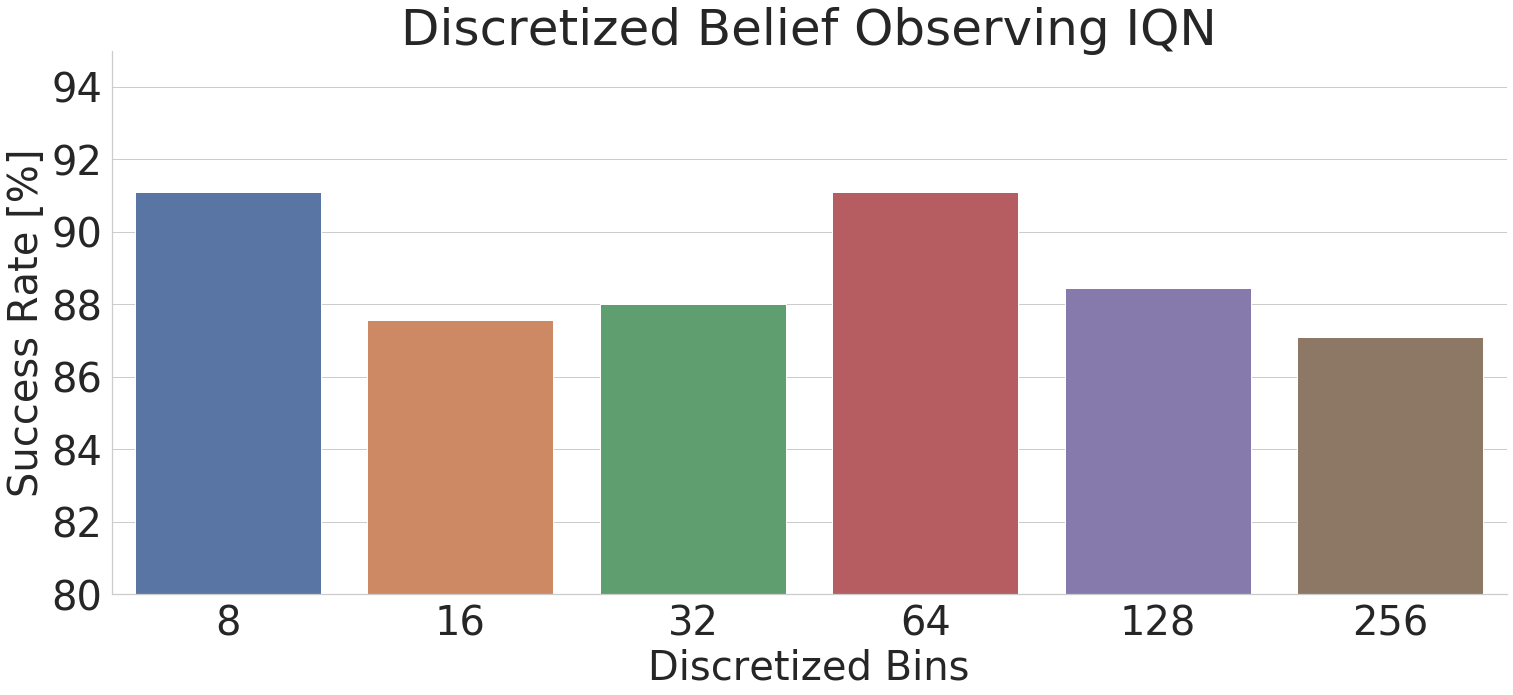

In [36]:
sns.set_theme(style="whitegrid")

plt.figure()

goal_reached = deepcopy(concatenated1)

# plt.xlabel('Discrete Actions', fontsize=50)
# plt.ylabel('Computed Q', fontsize=50)
# plt.legend(fontsize=30)
plt.rcParams['figure.figsize'] = (25.0, 10.0)


dy = sns.barplot(data=data, x=data.index, y='success')
axes = dy.axes
# dy.set(xlabel='Behavior', ylabel = "Success Rate [%]")
dy.set_ylim([80, 95])
plt.title('Discretized Belief Observing IQN', fontsize=50)
plt.xlabel(xlabel='Discretized Bins', fontsize=40)
plt.ylabel(ylabel = "Success Rate [%]", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')

plt.savefig('be_disc_iqn.pdf')
plt.show()

# dy.figure.savefig('num_goal_reached.png')

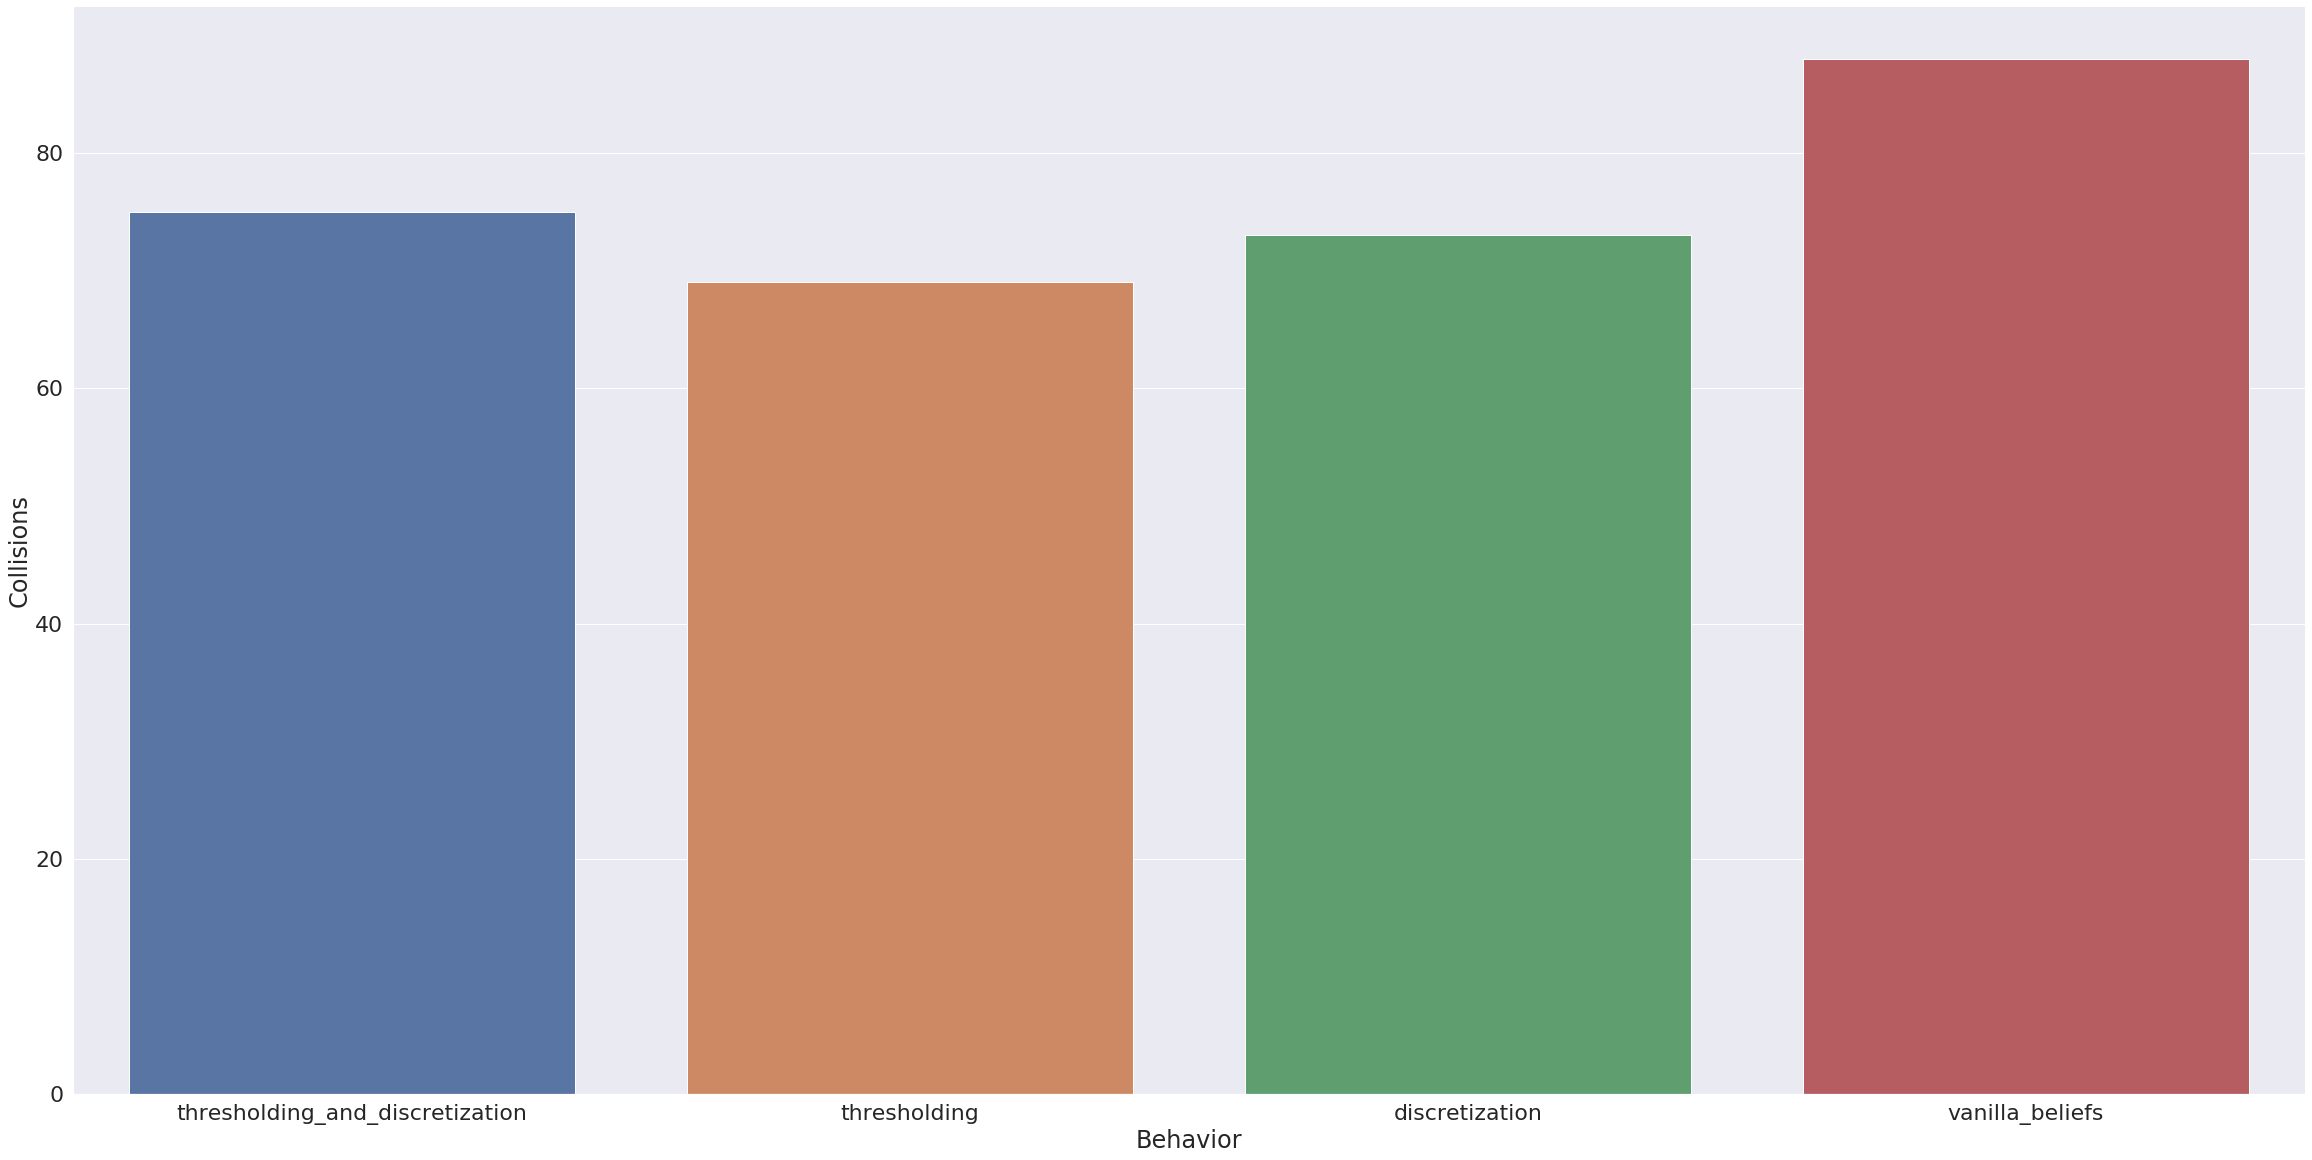

In [25]:
plt.figure()

collision_other = deepcopy(concatenated)
data = collision_other[collision_other.collision_other == True]


dy = sns.countplot(label='medium', data=data, x='behavior', order = concatenated['behavior'].value_counts().index)
axes = dy.axes
dy.set(xlabel='Behavior', ylabel = "Collisions")
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')

plt.show()

# dy.figure.savefig('num_collisions.png')

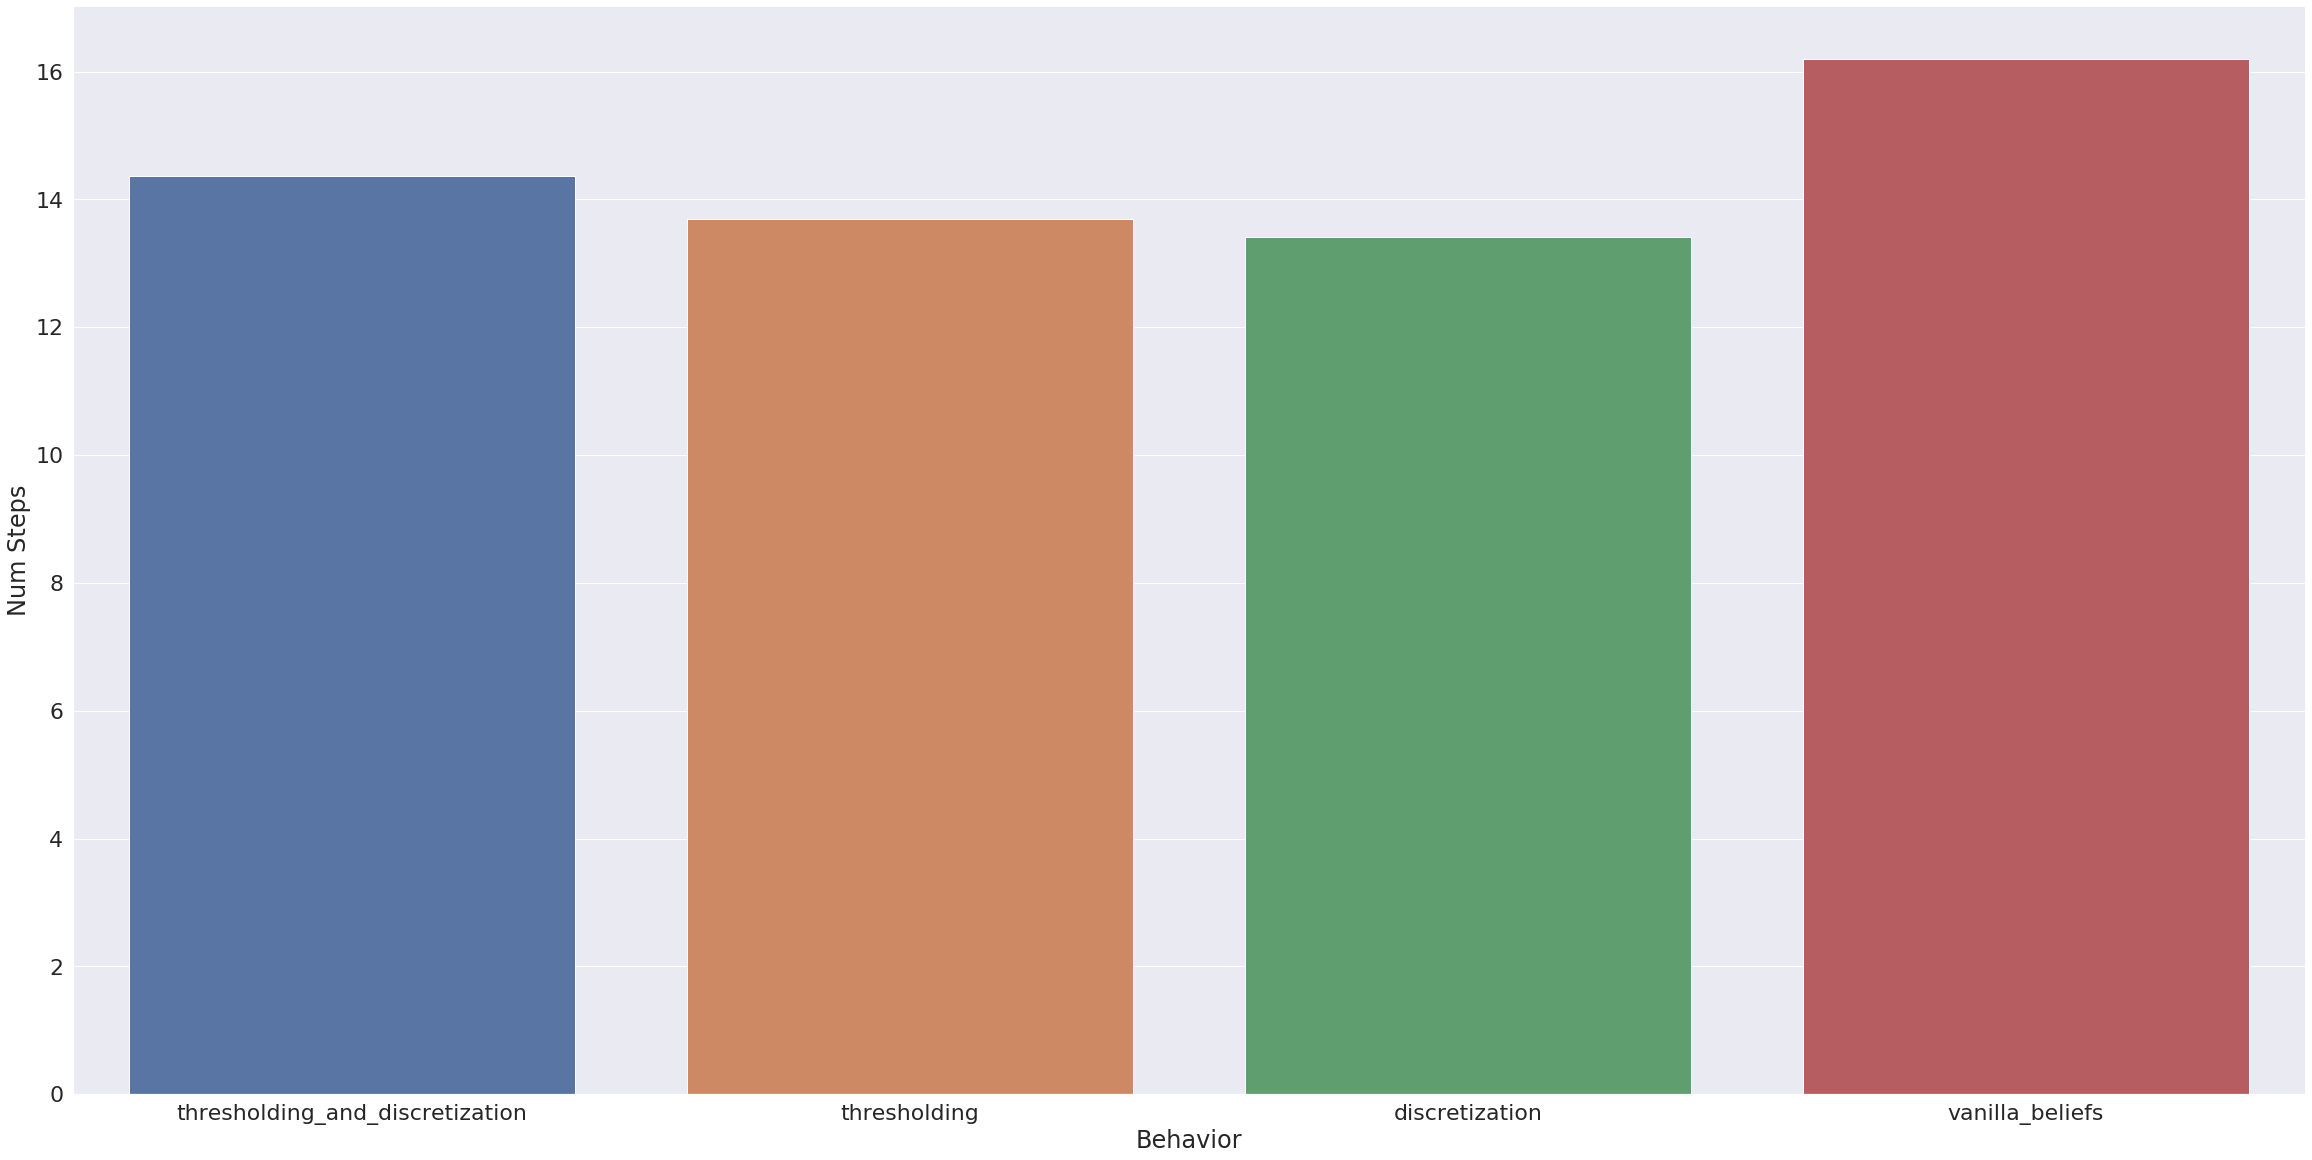

In [7]:
plt.figure()

num_steps = deepcopy(concatenated)
data = num_steps.groupby('behavior')['step'].mean().reset_index()

dy = sns.barplot(data=data, y='step', x='behavior', order = concatenated['behavior'].value_counts().index)
axes = dy.axes
dy.set(xlabel='Behavior', ylabel = "Num Steps")
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')

plt.show()

# dy.figure.savefig('max_steps.png')